#  Evolutionary Multiple-objective Optimization (part for 4.0)

- This script is for those who want to improve their final grade from 3.0 to 4.0. 
- Your task is to implement any one evolutionary algorithm for multiple-objective optimization introduced during the lecture (NSGA/NSGA-II/NSGA-II/MOEA/D/IBEA/HypE/SPEA2). It is recommended to implement NSGA-II or MOEA/D. 
- Note that it has to be your implementation (using external libraries is forbidden).
- The problem to be solved is the portfolio optimization tackled during lab 1.
- You can use the same data and price predictions as you made for lab 1 (Bundle1.zip) or update them accordingly to the next stage if you participate in the portfolio game (it is up to you).
- Apart from the two-objective scenario, consider also the three-objective one. As for the third objective, think about some reasonable risk-measure. You can maximize the number of non-zero weights, which should refer to minimizing risk by diversifying investments.
- Perform experimental evaluation of your implementation. You can use, e.g., the IDG or the HV metric to quantify the quality of populations constructed by the method.
- The experimental evaluation should be "reasonably extensive." E.g., run your method multiple times and average the results, show average convergence plots, do the sensitivity analysis (just four combinations of population size/generations will be enough), and depict some final populations. Also, compare the populations (only for 2D scenarios) with those generated by the ECM or WSM algorithm. Note that ECM and WSM already generate Pareto optimal solutions, so these can be considered good benchmarks for comparison.
- You can report your results here, i.e., in the jupyter notebook. You do not need to prepare any pdf report, etc. 
❓ How to initialize the population?
❓ What makes a good convergence plot?
❓ What should be averaged? Points in the objective space? Some scores?
❓

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import data_loading
import solver_create_front
import moead
import evolutionary_operators
import utils
import portfolio_visualization

In [2]:
companies = data_loading.load_all_companies_from_dir("./data/Bundle2")

# Creating Paret front approximations using the classical methods

In [3]:
# Using the methods from Project1 to generate the pareto fronts
ws_sol = solver_create_front.uniformly_search_weight_space(companies, 100, 300)
ws_arrays = [np.array(x[1]['x']) for x in ws_sol]
ec_sol = solver_create_front.uniformly_search_threshold_space(companies, 100, 300)
ec_arrays = [np.array(x[1]['x']) for x in ec_sol]

In [4]:
# epected returns for companies were calculated within the "uniformly_search_..." functions
ws_points = [(utils.portfolio_expected_return(companies, p)[0], utils.portfolio_risk(companies, p)) for p in ws_arrays]
ec_points = [(utils.portfolio_expected_return(companies, p)[0], utils.portfolio_risk(companies, p)) for p in ec_arrays]

In [5]:
RET_NORM_CONST = ec_points[-1][0] - ec_points[0][0]
RISK_NORM_CONST = ec_points[-1][1] - ec_points[0][1]

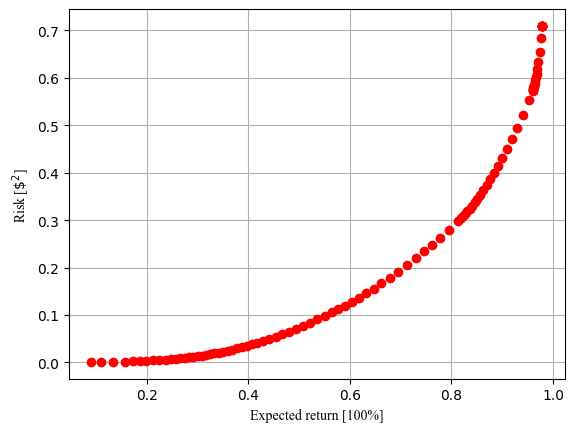

In [6]:
solver_create_front.plot_front(companies, ws_sol)

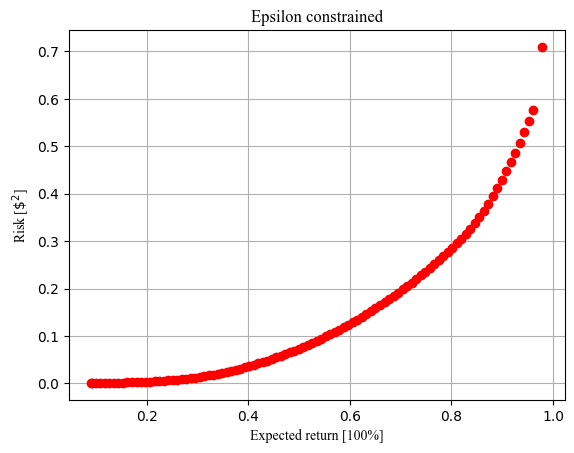

In [7]:
solver_create_front.plot_front(companies, ec_sol, title="Epsilon constrained")

# MOEA/D - 2D case

In [8]:
MOEAD_PARAMETERS = {
    "fitness_function_name": "weighted_sum",
    "n_objectives": 2,
    "neighborhood_size": 3,
    "generations": 500,
    "population_size": 100,
    "crossover_distr_idx": 1,
    "mutation_probability": 0.1,
}
EXPORT_PATH = "exported_pop.txt"

REDUCED POP SIZE IN GENERATION: 143
Want: 100, have: 97


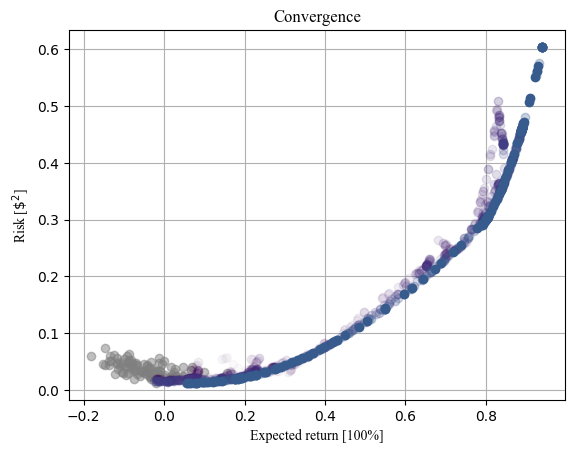

In [9]:
moead_pop, gen_number = moead.MOEAD_main_loop(companies, EXPORT_PATH, MOEAD_PARAMETERS, RET_NORM_CONST, RISK_NORM_CONST, **MOEAD_PARAMETERS)
moead.plot_population(companies, moead_pop, gen_number/MOEAD_PARAMETERS["generations"], title="Convergence", alpha=1.0)

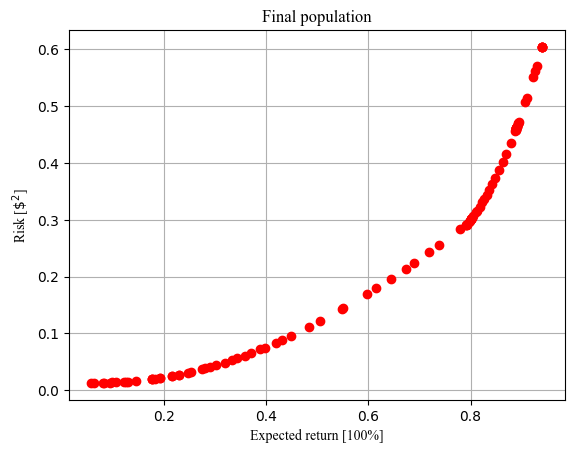

In [10]:
moead.plot_population(companies, moead_pop, gen_number/MOEAD_PARAMETERS["generations"], title="Final population", force_color="red")

In [11]:
evolutionary_operators.export_population(moead_pop, EXPORT_PATH, MOEAD_PARAMETERS, gen_number, mode="a+", skip_header=True)

In [12]:
points_moead_pop = [(utils.portfolio_expected_return(companies, individual), utils.portfolio_risk(companies, individual)) for individual in moead_pop]

In [13]:
evolutionary_operators.inverted_generational_distance(ec_points, points_moead_pop)

0.003213954317798283

# MOEA/D - 3D case

In [14]:
MOEAD_PARAMETERS_3D = {
    "fitness_function_name": "weighted_sum",
    "n_objectives": 3,
    "neighborhood_size": 3,
    "generations": 500,
    "population_size": 100,
    "crossover_distr_idx": 1,
    "mutation_probability": 0.1,
}
EXPORT_PATH_3D = "exported_pop_3D.txt"

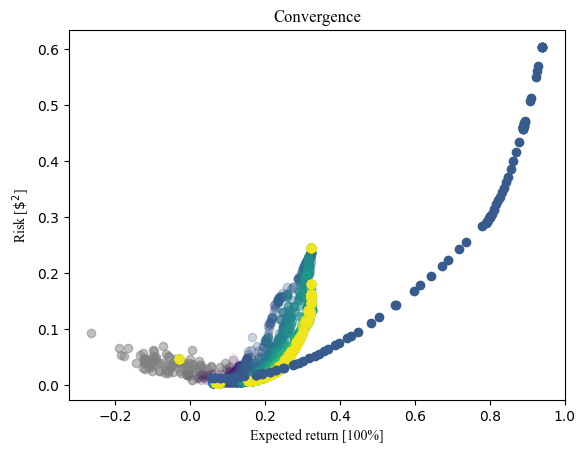

In [15]:
moead_pop_3D, gen_number_3D = moead.MOEAD_main_loop(companies, EXPORT_PATH_3D, MOEAD_PARAMETERS_3D, RET_NORM_CONST, RISK_NORM_CONST, **MOEAD_PARAMETERS_3D)
moead.plot_population(companies, moead_pop, gen_number/MOEAD_PARAMETERS_3D["generations"], title="Convergence", alpha=1.0)

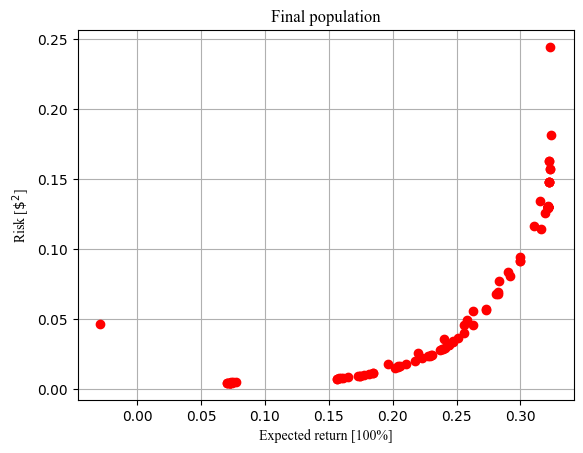

In [16]:
moead.plot_population(companies, moead_pop_3D, gen_number/MOEAD_PARAMETERS_3D["generations"], title="Final population", force_color="red")

In [17]:
evolutionary_operators.export_population(moead_pop_3D, EXPORT_PATH_3D, MOEAD_PARAMETERS_3D, gen_number_3D, mode="a+", skip_header=True)

In [18]:
points_moead_pop_3D = [(utils.portfolio_expected_return(companies, individual), utils.portfolio_risk(companies, individual)) for individual in moead_pop_3D]

In [19]:
evolutionary_operators.inverted_generational_distance(ec_points, points_moead_pop_3D)


0.03345508580620449

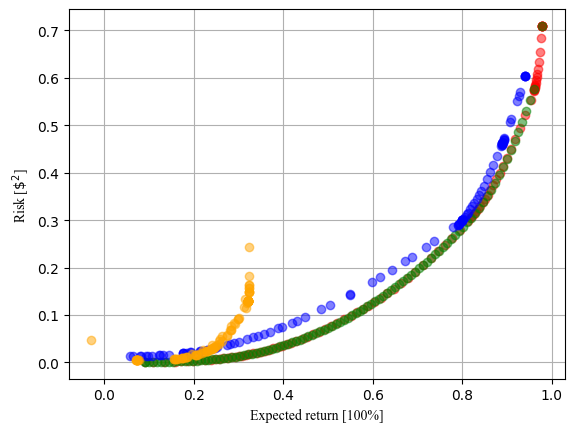

In [20]:
plt.plot(np.array(ws_points)[:, 0], np.array(ws_points)[:, 1], "o", color="red", alpha=0.5)
plt.plot(np.array(ec_points)[:, 0], np.array(ec_points)[:, 1], "o", color="green", alpha=0.5)
plt.plot(np.array(points_moead_pop)[:, 0], np.array(points_moead_pop)[:, 1], "o", color="blue", alpha=0.5)
plt.plot(np.array(points_moead_pop_3D)[:, 0], np.array(points_moead_pop_3D)[:, 1], "o", color="orange", alpha=0.5)
label_font = {'fontname': 'Times New Roman'}
plt.xlabel("Expected return [100%]", **label_font)
plt.ylabel("Risk [$ \$^2 $] ", **label_font)
plt.grid()
plt.show()

In [21]:
moead_params, individuals, generations = evolutionary_operators.load_population(EXPORT_PATH)
moead_params_3D, individuals_3D, generations_3D = evolutionary_operators.load_population(EXPORT_PATH_3D)

In [22]:
individuals_points = np.array([(utils.portfolio_expected_return(companies, p), utils.portfolio_risk(companies, p)) for p in individuals])
individuals_points_3D = np.array([(utils.portfolio_expected_return(companies, p), utils.portfolio_risk(companies, p)) for p in individuals_3D])

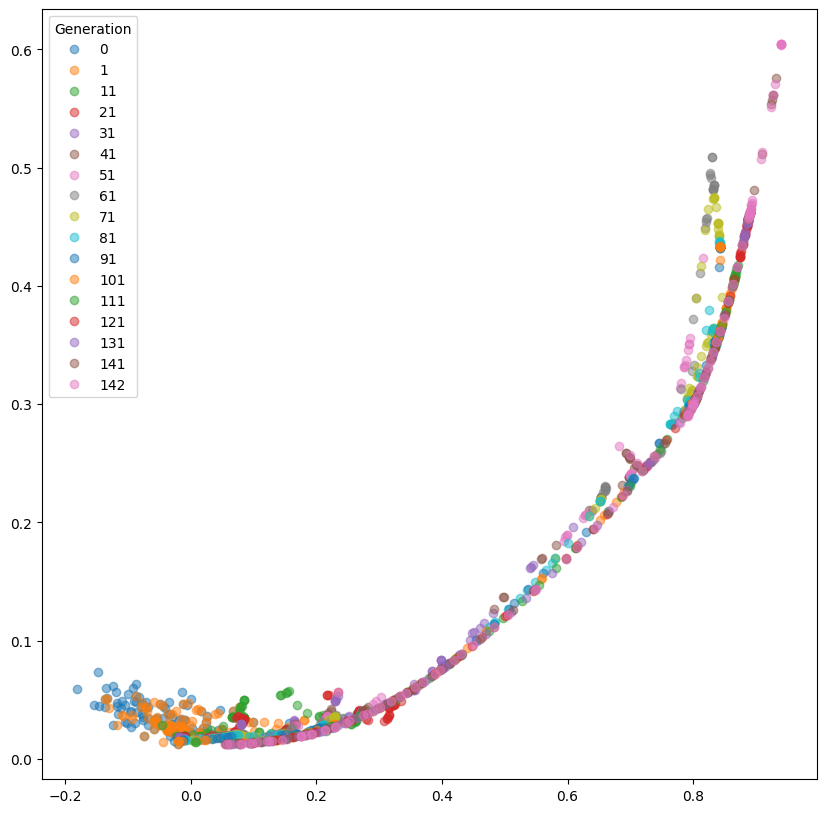

In [41]:
for start in range(0, int(len(individuals_points)-1/moead_params["population_size"]), moead_params["population_size"]):
    end = start + moead_params["population_size"]
    plt.plot(individuals_points[start:end, 0], individuals_points[start:end, 1], "o", label=generations[start], alpha=0.5)
plt.legend(title="Generation", loc=2)
plt.gcf().set_size_inches(10, 10)
plt.show()

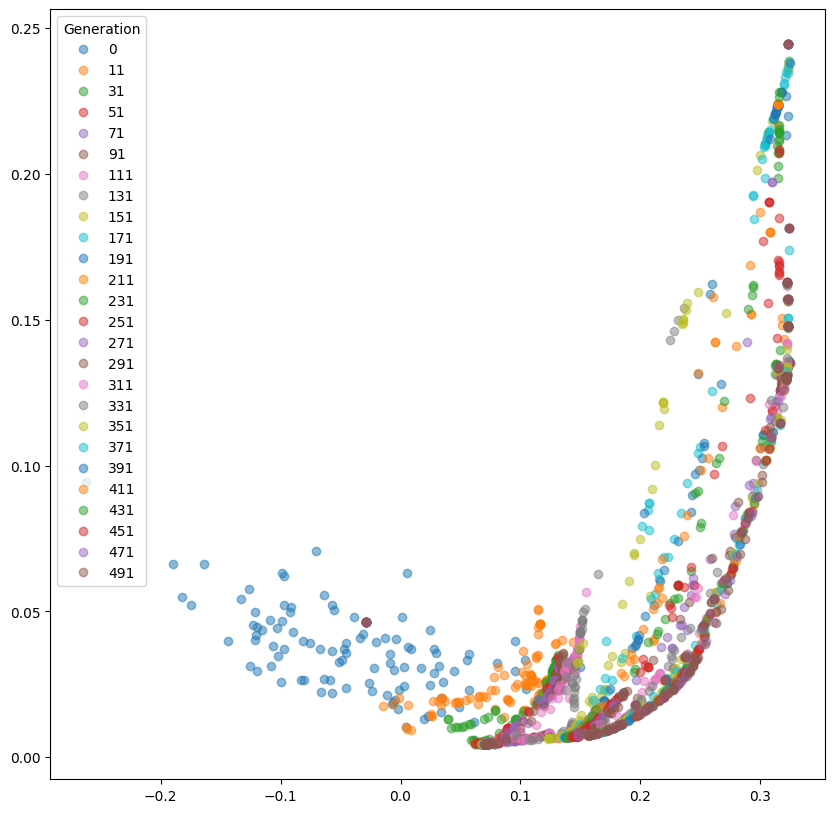

In [37]:
for start in range(0, int(len(individuals_points_3D)-1/moead_params_3D["population_size"]),
                    2*moead_params_3D["population_size"]):
    end = start + moead_params_3D["population_size"]
    plt.plot(individuals_points_3D[start:end, 0], individuals_points_3D[start:end, 1], "o", label=generations_3D[start], alpha=0.5)
plt.legend(title="Generation", loc=2)
plt.gcf().set_size_inches(10, 10)
plt.show()